<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear

In [65]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    ) # keep random state so we get the same values

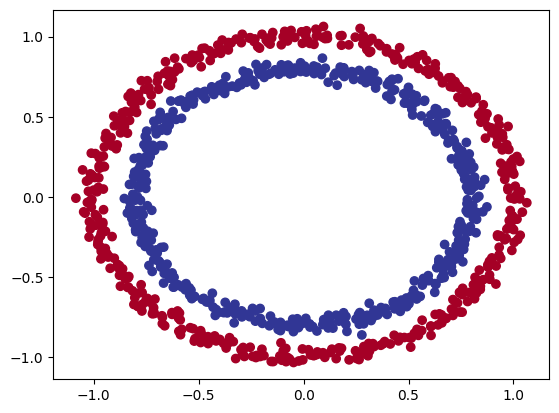

In [66]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [67]:
# prompt: turn X and y into torch.tensor format and split them into train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [68]:
# Replicate CircleModelV0 with nn.Sequential
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

In [69]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1213], device='cuda:0'))])

In [70]:
# the digital playground thing for neural network is amaizing:)

In [71]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [72]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [73]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2539],
        [ 0.2011],
        [ 0.1367],
        [ 0.3161],
        [-0.0699]], device='cuda:0', grad_fn=<SliceBackward0>)

In [74]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5631],
        [0.5501],
        [0.5341],
        [0.5784],
        [0.4825]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [75]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [76]:
__doc__

'Automatically created module for IPython interactive environment'

In [77]:
l = dir()

In [78]:
print(l)

['CircleModelV0', 'CircleModelV2', 'In', 'Out', 'Path', 'X', 'X_test', 'X_train', '_', '_10', '_11', '_12', '_15', '_18', '_19', '_29', '_34', '_38', '_39', '_4', '_43', '_44', '_45', '_46', '_49', '_5', '_52', '_53', '_63', '_68', '_69', '_73', '_74', '_75', '_76', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_i57', '_i58', '_i59', '_i6', '_i60', '_i61', '_i62', '_i63', '_i64', '_i65', '_i66', '_i67', '_i68', '_i69', '_i7', '_i70', '_i71', '_i72', '_i73', '_i74', '_i75', '_i76', '_i77',

In [79]:
__builtins__

<module 'builtins' (built-in)>

In [80]:
for i,j in zip(dir(), range(len(l))):
    print(j,i)

0 CircleModelV0
1 CircleModelV2
2 In
3 Out
4 Path
5 X
6 X_test
7 X_train
8 _
9 _10
10 _11
11 _12
12 _15
13 _18
14 _19
15 _29
16 _34
17 _38
18 _39
19 _4
20 _43
21 _44
22 _45
23 _46
24 _49
25 _5
26 _52
27 _53
28 _63
29 _68
30 _69
31 _73
32 _74
33 _75
34 _76
35 _79
36 _9
37 __
38 ___
39 __builtin__
40 __builtins__
41 __doc__
42 __loader__
43 __name__
44 __package__
45 __spec__
46 _dh
47 _exit_code
48 _i
49 _i1
50 _i10
51 _i11
52 _i12
53 _i13
54 _i14
55 _i15
56 _i16
57 _i17
58 _i18
59 _i19
60 _i2
61 _i20
62 _i21
63 _i22
64 _i23
65 _i24
66 _i25
67 _i26
68 _i27
69 _i28
70 _i29
71 _i3
72 _i30
73 _i31
74 _i32
75 _i33
76 _i34
77 _i35
78 _i36
79 _i37
80 _i38
81 _i39
82 _i4
83 _i40
84 _i41
85 _i42
86 _i43
87 _i44
88 _i45
89 _i46
90 _i47
91 _i48
92 _i49
93 _i5
94 _i50
95 _i51
96 _i52
97 _i53
98 _i54
99 _i55
100 _i56
101 _i57
102 _i58
103 _i59
104 _i6
105 _i60
106 _i61
107 _i62
108 _i63
109 _i64
110 _i65
111 _i66
112 _i67
113 _i68
114 _i69
115 _i7
116 _i70
117 _i71
118 _i72
119 _i73
120 _i74
121 _i

In [81]:
# dir(), globals(), locals() five you the spection that you want!

In [82]:
y_test[:10]

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [83]:
torch.round(torch.sigmoid(model_0(X_test[:10].to(device))))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [84]:
# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [85]:

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy

    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train.squeeze())
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test.squeeze())
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69788, Accuracy: 40099.50% | Test loss: 0.69553, Test acc: 10200.00%
Epoch: 10 | Loss: 0.69363, Accuracy: 40060.50% | Test loss: 0.69622, Test acc: 9866.00%
Epoch: 20 | Loss: 0.69327, Accuracy: 40062.00% | Test loss: 0.69564, Test acc: 9930.00%
Epoch: 30 | Loss: 0.69312, Accuracy: 40064.00% | Test loss: 0.69484, Test acc: 9932.00%
Epoch: 40 | Loss: 0.69306, Accuracy: 40038.50% | Test loss: 0.69476, Test acc: 9966.00%
Epoch: 50 | Loss: 0.69305, Accuracy: 40019.50% | Test loss: 0.69451, Test acc: 9966.00%
Epoch: 60 | Loss: 0.69305, Accuracy: 40033.50% | Test loss: 0.69436, Test acc: 9948.00%
Epoch: 70 | Loss: 0.69305, Accuracy: 40038.00% | Test loss: 0.69435, Test acc: 9954.00%
Epoch: 80 | Loss: 0.69305, Accuracy: 40031.00% | Test loss: 0.69430, Test acc: 9962.00%
Epoch: 90 | Loss: 0.69305, Accuracy: 40036.50% | Test loss: 0.69428, Test acc: 9956.00%


In [86]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [87]:

from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  !wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


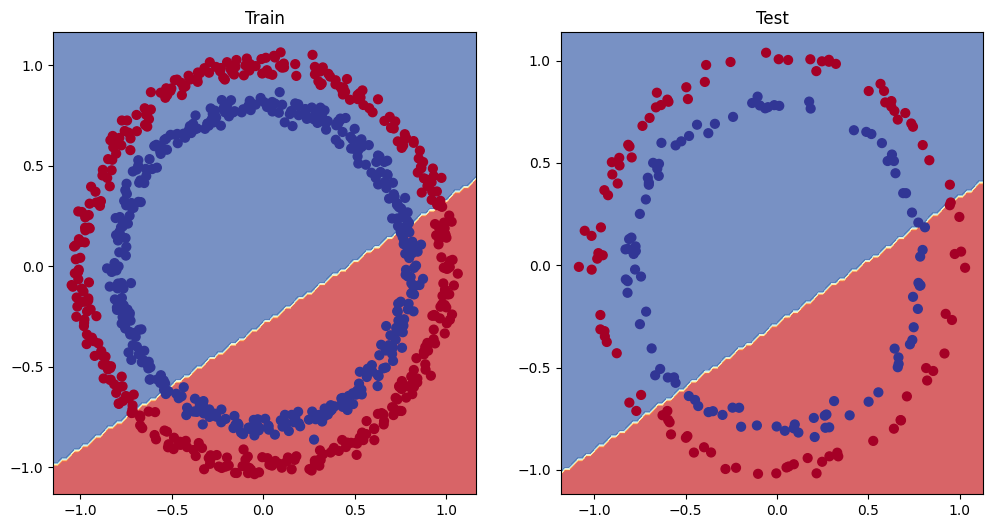

In [88]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [89]:
!pwd

/content


In [90]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# Nonlinear

In [91]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [92]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [93]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train.squeeze()) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test.squeeze())
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71492, Accuracy: 39800.00% | Test Loss: 0.70788, Test Accuracy: 10200.00%
Epoch: 100 | Loss: 0.69218, Accuracy: 39876.50% | Test Loss: 0.69216, Test Accuracy: 10118.00%
Epoch: 200 | Loss: 0.69038, Accuracy: 40006.50% | Test Loss: 0.69101, Test Accuracy: 9992.00%
Epoch: 300 | Loss: 0.68848, Accuracy: 40008.00% | Test Loss: 0.68952, Test Accuracy: 9986.00%
Epoch: 400 | Loss: 0.68536, Accuracy: 39989.50% | Test Loss: 0.68676, Test Accuracy: 10002.00%
Epoch: 500 | Loss: 0.68092, Accuracy: 39999.00% | Test Loss: 0.68325, Test Accuracy: 9990.00%
Epoch: 600 | Loss: 0.67411, Accuracy: 39991.50% | Test Loss: 0.67742, Test Accuracy: 10002.00%
Epoch: 700 | Loss: 0.66313, Accuracy: 39986.00% | Test Loss: 0.66721, Test Accuracy: 10012.00%
Epoch: 800 | Loss: 0.64302, Accuracy: 39988.50% | Test Loss: 0.64742, Test Accuracy: 10014.00%
Epoch: 900 | Loss: 0.60203, Accuracy: 40008.50% | Test Loss: 0.60559, Test Accuracy: 10004.00%


In [94]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels


(tensor([1., 0., 0., 0., 0., 0., 1., 1., 1., 1.], device='cuda:0'),
 tensor([[1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.]]))

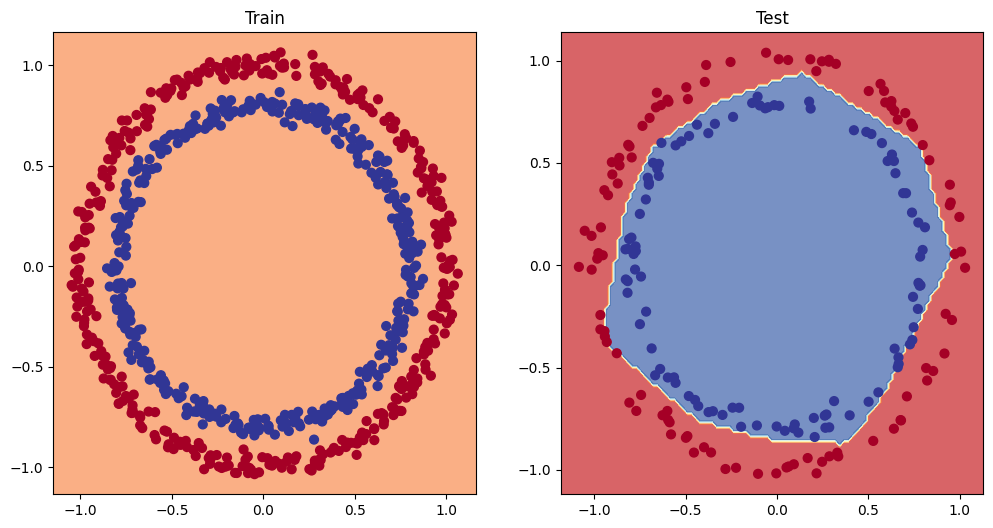

In [95]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity